In [79]:
%matplotlib nbagg
# %matplotlib inline

In [80]:
import matplotlib.pyplot as plt

In [81]:
import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')
from figFcns import *
from kyvadlo_simSch import *

# Meranie prechodových charakteristík


## Úlohy v rámci predmetu UKYB

###### Hlavná úloha:

Odmerajte prechodové charakteristiky predmetného systému (laboratórny systém) v rôznych pracovných bodoch. Pracovné body nech sú zvolené s prihliadnutím na prevodovú charakteristiku systému.

###### Vedľajšia úloha:

Na základe prechodovej charakteristiky identifikujte model reálneho laboratórneho systému, pričom modelom nech je lineárny dynamický systém, ktorý je možné vyjadriť ako prenosovú funkciu.

<hr>

Východiská: namerané prevodové charakteristiky systému

  - mimochodom, koľko vstupov má predmetný systém? (aké je označenie príslušného signálu a jeho jednotky?)
  - koľko výstupov má predmetný systém? (označenie signálu a jeho jednotky?)

V rámci predmetu UKYB sa predpokladá, že sú k dispozícii 2 prevodové charakteristiky laboratórneho systému. Boli namerané pri dvoch rôznych nastaveniach laboratórneho systému (otáčky ventilátora alebo záťaž motora).

Na každej prevodovej je potrebné zvoliť 3 pracovné body - prvý v oblasti nízkych hodnôt vstupného signálu, druhý v oblasti stredných hodnôt vstupného signálu a tretí v oblasti vysokých hodnôt vstupného signálu. V každom pracovnom bode je potrebné odmerať prechodovú charakteristiku. Celkom teda $2 \times 3 = 6$ prechodových charakteristík. Pre každú prechodovú charakteristiku je potrevné pokúsiť sa o identifikáciu modelu.

<hr>

### Stručné vysvetlenie pojmov

Pracovný bod je definovaný ustálenou hodnotou vstupného signálu, ku ktorej (jednoznačne) prislúcha ustálená hodnota výstupného signálu. Dvojica hodnôt, hodnota na vstupe a hodnota na výstupe, tvorí pracovný bod.

Ak je daná ustálená hodnota vstupného signálu, potom je možné pomocou prevodovej charakteristiky nájsť prislúchajúcu ustálenú hodnotu výstupného signálu.

Pojem pracovný bod na seba viaže aj pojem <i>okolie pracovného bodu</i>. V okolí pracovného bodu sú vlastnosti sysemu relatívne rovnaké ako v pracovnom bode. Z hľadiska statických vlastností systému to znamená, že v okolí pracovného bodu sa sklon prevodovej charakteristiky relatívne nemení. Inými slovami, statické zosilnenie systému sa nemení. Rovnako aj dynamické vlastnosti systému sú v okolí pracovného bodu relatívne nemenné - časové konštanty systému sa nemenia.

V dvoch rôznych pracovných bodoch môže mať reálny systém napríklad rozdielne statické zosilnenie, teda statické vlastnosti. Statické zosilnenie systému v pracovnom bode je možné určiť na základe prevodovej charakteristiky. Je dané sklonom prevodovej charakteristiky v okolí pracovného bodu.

Prípadný rozdiel v statických vlastnostiach v rôznych pracovných bodoch však nehovorí nič o prípadnom rozdiele dynamických vlastnostiach systému. Dynamické vlastnosti je možné vyhodnocovať na základe prechodovej charakteristiky.

<i>Prechodová charakteristika</i> je odozva systému na jednotkový skok.

Pod pojmom <i>jednotkový skok</i> sa rozumie skoková zmena signálu (vstupného) a veľkosť tejto zmeny je jednotková. Je jednotková zmysle, že akúkoľvek veľkosť skokovej zmeny má zmysel (prípadne) vyjadriť ako násobok jednotkovej skokovej zmeny. Prirodzene sa predpokladá, že jednotková zmena je taká, že nespôsobí, že systém sa dostane mimo okolia pracovného bodu.

## O meraní prechodovej charakteristiky

Na rozdiel od práce v rámci predmetu UKYB sa v nasledujúcom, pre ilustráciu merania prechodovej charakteristiky, používa simulovaný systém - kyvadlo (tak ako v predchádzajúcich témach).

Prevodová charakteristika je nasledovná:

In [82]:
prevodChar = np.loadtxt('misc/dataRepo/prevodChar.csv')

<IPython.core.display.Javascript object>


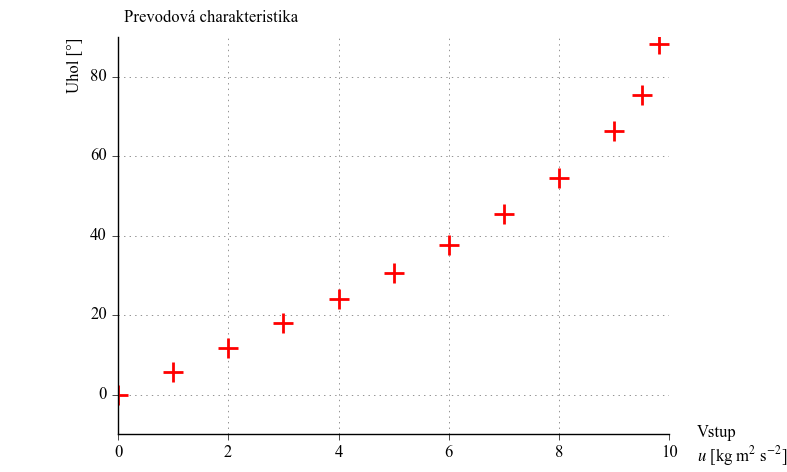

In [83]:
fig = plt.figure(1, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(subPlots[0])
for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

ax0.set_title(u'Prevodová charakteristika', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')
ax0.set_xlabel(u'Vstup\n$u$ [kg m$^2$ s$^{-2}$]', x=1.05, ha='left', va='bottom')

ax0.plot(prevodChar[:,0], prevodChar[:,1],
         '+r', ms=15, mew=2,
         label=u'Prevodová ch.'
         )

fcnDefaultLayoutAdj(fig, 0.15, 0.4, 0.92, 0.08)

Výpočet koeficientov polynómu aproximujúceho prevodovú charakteristiku:

In [84]:
H = np.hstack([
            np.ones([prevodChar[:,0].shape[0],1]),
            prevodChar[:,0].reshape(-1,1),
            (prevodChar[:,0].reshape(-1,1))**2,
            (prevodChar[:,0].reshape(-1,1))**3,
            ])

y = prevodChar[:,1].reshape(-1,1)

theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(H.T, H)), H.T), y)

Vyčíslenie a vykreslenie aproximácie (polynomiálnej) prevodovej charaketristiky:

<IPython.core.display.Javascript object>


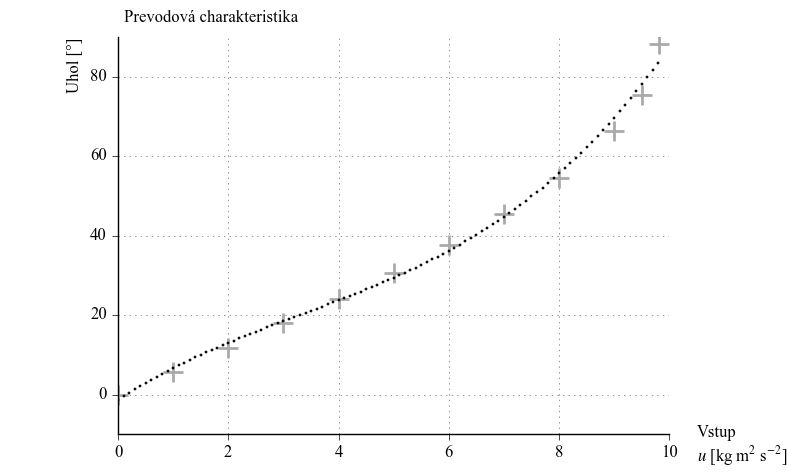

In [85]:
u_custom = np.arange(0,9.81,0.1).reshape(-1,1)

y_model = np.zeros(u_custom.shape)
for idx in range(u_custom.shape[0]):
    for power in range(H.shape[1]):
        y_model[idx,0] = y_model[idx,0] + (u_custom[idx,0]**power) * theta[power]

        

#----------------------------------------------        
fig = plt.figure(2, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(subPlots[0])
for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

ax0.set_title(u'Prevodová charakteristika', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')
ax0.set_xlabel(u'Vstup\n$u$ [kg m$^2$ s$^{-2}$]', x=1.05, ha='left', va='bottom')

ax0.plot(prevodChar[:,0], prevodChar[:,1],
         '+', ms=15, mew=2, mec='#aaaaaa',
         label=u'Prevodová ch.'
         )

ax0.plot(u_custom, y_model,
         '.k', ms=3,
         label=u'aproximácia',
         )

fcnDefaultLayoutAdj(fig, 0.15, 0.4, 0.92, 0.08)
#----------------------------------------------   

### Voľba pracovných bodov

Zvoľme dva pracovné body:

1.PB: $u=4$ [kg m$^2$ s$^{-2}$] 

2.PB: $u=9,5$ [kg m$^2$ s$^{-2}$] 

Na základe nameraných bodov prevodovej charakteristiky by sme mohli k zvoleným ustáleným vstupným hodnotám priradiť výstupné hodnoty:

1.PB: $y=24,2$ [°] 

2.PB: $y=75,5$ [°] 

Pracujme však s aproximáciou prevodovej charakteristiky, teda s jej modelom. Model nám umožní získať aj také informácie, ktoré neboli reálne namerané.

Pre $u = 4$ [kg m$^2$ s$^{-2}$] podľa modelu prevodovej charakteristiky prislúcha hodnota ustáleného výslupu:

In [86]:
u_PB1 = 4.0
y_PB1 = theta[0,0] + theta[1,0] * u_PB1 + theta[2,0] * u_PB1**2 + theta[3,0] * u_PB1**3
print u'y_PB1 = {:6.2f} [°]'.format(y_PB1)

y_PB1 =  23.76 [°]


Pre $u = 9,5$ [kg m$^2$ s$^{-2}$] podľa modelu prevodovej charakteristiky prislúcha hodnota ustáleného výslupu:

In [87]:
u_PB2 = 9.5
y_PB2 = theta[0,0] + theta[1,0] * u_PB2 + theta[2,0] * u_PB2**2 + theta[3,0] * u_PB2**3
print u'y_PB2 = {:6.2f} [°]'.format(y_PB2)

y_PB2 =  78.13 [°]


Znázornime pracovné body:

<IPython.core.display.Javascript object>


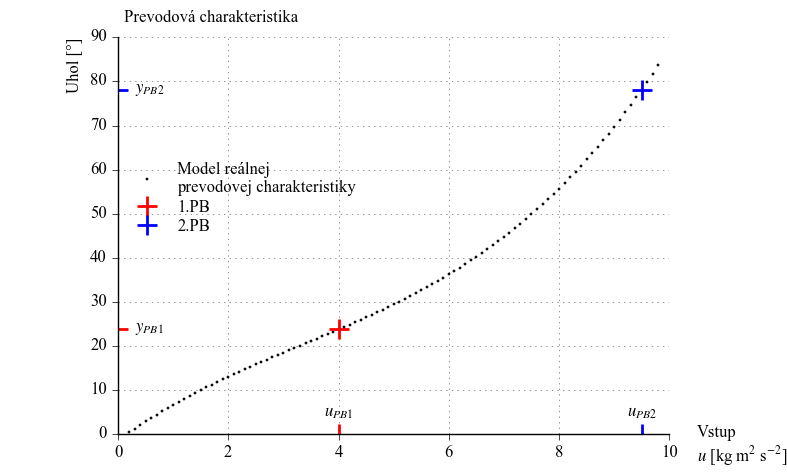

In [88]:
#----------------------------------------------        
fig = plt.figure(3, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(subPlots[0])
for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
    

ax0.set_title(u'Prevodová charakteristika', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')
ax0.set_xlabel(u'Vstup\n$u$ [kg m$^2$ s$^{-2}$]', x=1.05, ha='left', va='bottom')

ax0.set_ylim([0, 90])

ax0.plot(u_custom, y_model,
         '.k', ms=3,
         label=u'Model reálnej\nprevodovej charakteristiky',
         )

ax0.plot(u_PB1, y_PB1,
         '+', ms=15, mew=2, mec='r',
         label=u'1.PB'
         )

ax0.plot(u_PB2, y_PB2,
         '+', ms=15, mew=2, mec='b',
         label=u'2.PB'
         )

fcnDefaultLayoutAdj(fig, 0.15, 0.4, 0.92, 0.08)

#-------------
#Doplnujuce info v obr:

ax0.plot(u_PB1, 0,
         '|', ms=15, mew=2, mec='r',
         )
ax0.text(u_PB1, 3,
         u'$u_{PB1}$',
         ha='center', va='bottom',
        )
ax0.plot(0, y_PB1,
         '_', ms=15, mew=2, mec='r',
         )
ax0.text(0.3, y_PB1,
         u'$y_{PB1}$',
         ha='left', va='center',
        )

ax0.plot(u_PB2, 0,
         '|', ms=15, mew=2, mec='b',
         )
ax0.text(u_PB2, 3,
         u'$u_{PB2}$',
         ha='center', va='bottom',
        )
ax0.plot(0, y_PB2,
         '_', ms=15, mew=2, mec='b',
         )
ax0.text(0.3, y_PB2,
         u'$y_{PB2}$',
         ha='left', va='center',
        )

handles_ax0, labels_ax0 = ax0.get_legend_handles_labels()
ax0.legend(handles_ax0, labels_ax0,
           loc=2, bbox_to_anchor=(0.02, 0.69), ncol=1,
           )
#----------------------------------------------  

Ďalej je, samozrejme, potrebné vhodne zvoliť okolie pracovného bodu (pre každý pracovný bod). V podstate je potrebné voliť pracovný bod a prislúchajúce okolie pracovného bodu naraz. Len tu sme to pre lepšiu názornosť oddelili.


Pripomeňme, že v okolí pracovného bodu sa očakáva, že vlastnosti systému sú relatívne nemenné. Na základe prevodovej charakteristiky možno posúdiť statické vlastnosti systému. Na základe toho, pre 1. pracovný bod (PB1) zvoľme okolie $u = 4 \pm 0,8$ [kg m$^2$ s$^{-2}$]. Pre PB2 zvoľme $u = 9,5 \pm 0,25$ [kg m$^2$ s$^{-2}$]. Znázornime pracovné body a ich okolia:

In [89]:
u_PB1_okol = 0.8

y_PB1_h = theta[0,0] + theta[1,0] * (u_PB1+u_PB1_okol) + theta[2,0] * (u_PB1+u_PB1_okol)**2 + theta[3,0] * (u_PB1+u_PB1_okol)**3
y_PB1_l = theta[0,0] + theta[1,0] * (u_PB1-u_PB1_okol) + theta[2,0] * (u_PB1-u_PB1_okol)**2 + theta[3,0] * (u_PB1-u_PB1_okol)**3

u_PB2_okol = 0.25

y_PB2_h = theta[0,0] + theta[1,0] * (u_PB2+u_PB2_okol) + theta[2,0] * (u_PB2+u_PB2_okol)**2 + theta[3,0] * (u_PB2+u_PB2_okol)**3
y_PB2_l = theta[0,0] + theta[1,0] * (u_PB2-u_PB2_okol) + theta[2,0] * (u_PB2-u_PB2_okol)**2 + theta[3,0] * (u_PB2-u_PB2_okol)**3

print y_PB1_h

28.2448794124


<IPython.core.display.Javascript object>


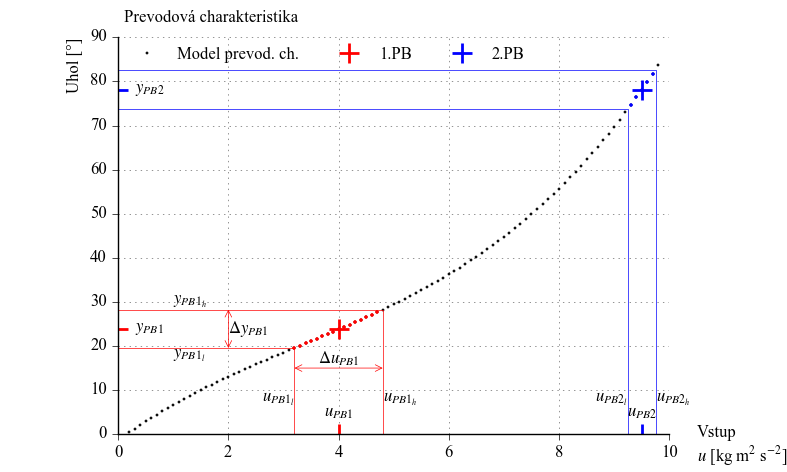

In [90]:
fig = plt.figure(4, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(subPlots[0])
for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)


ax0.set_title(u'Prevodová charakteristika', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')
ax0.set_xlabel(u'Vstup\n$u$ [kg m$^2$ s$^{-2}$]', x=1.05, ha='left', va='bottom')

ax0.set_ylim([0, 90])

ax0.plot(u_custom, y_model,
         '.k', ms=3,
         label=u'Model prevod. ch.',
         )

ax0.plot(u_PB1, y_PB1,
         '+', ms=15, mew=2, mec='red',
         label=u'1.PB'
         )

ax0.plot([u_PB1-u_PB1_okol, u_PB1-u_PB1_okol, 0], [0, y_PB1_l, y_PB1_l],
         '-', color='r', lw=0.5,
         )
ax0.plot([u_PB1+u_PB1_okol, u_PB1+u_PB1_okol, 0], [0, y_PB1_h, y_PB1_h],
         '-', color='r', lw=0.5,
         )


ax0.plot(u_PB2, y_PB2,
         '+', ms=15, mew=2, mec='b',
         label=u'2.PB'
         )

ax0.plot([u_PB2-u_PB2_okol, u_PB2-u_PB2_okol, 0], [0, y_PB2_l, y_PB2_l],
         '-', color='b', lw=0.5,
         )
ax0.plot([u_PB2+u_PB2_okol, u_PB2+u_PB2_okol, 0], [0, y_PB2_h, y_PB2_h],
         '-', color='b', lw=0.5,
         )


temp_Mask_PB1 = np.logical_and((u_custom >= u_PB1-u_PB1_okol), (u_custom <= u_PB1+u_PB1_okol))
ax0.plot(u_custom[temp_Mask_PB1], y_model[temp_Mask_PB1],
         '.r', ms=4,
         )

temp_Mask_PB2 = np.logical_and((u_custom >= u_PB2-u_PB2_okol), (u_custom <= u_PB2+u_PB2_okol))
ax0.plot(u_custom[temp_Mask_PB2], y_model[temp_Mask_PB2],
         '.b', ms=4,
         )


fcnDefaultLayoutAdj(fig, 0.15, 0.4, 0.92, 0.08)

#-------------
#Doplnujuce info v obr:

#--------
ax0.plot(u_PB1, 0,
         '|', ms=15, mew=2, mec='r',
         )
ax0.text(u_PB1, 3,
         u'$u_{PB1}$',
         ha='center', va='bottom',
        )
ax0.text(u_PB1 - u_PB1_okol, 6,
         u'$u_{PB1_l}$',
         ha='right', va='bottom',
        )
ax0.text(u_PB1 + u_PB1_okol, 6,
         u'$u_{PB1_h}$',
         ha='left', va='bottom',
        )
ax0.annotate(s='', xy=(u_PB1 - u_PB1_okol,15), xytext=(u_PB1 + u_PB1_okol,15), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5)
            )
ax0.text(u_PB1, 15,
         u'$\Delta u_{PB1}$',
         ha='center', va='bottom',
        )

ax0.plot(0, y_PB1,
         '_', ms=15, mew=2, mec='r',
         )
ax0.text(0.3, y_PB1,
         u'$y_{PB1}$',
         ha='left', va='center',
        )
ax0.text(1, y_PB1_l,
         u'$y_{PB1_l}$',
         ha='left', va='top',
        )
ax0.text(1, y_PB1_h,
         u'$y_{PB1_h}$',
         ha='left', va='bottom',
        )
ax0.annotate(s='', xy=(2,y_PB1_l), xytext=(2,y_PB1_h), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5)
            )
ax0.text(2, y_PB1,
         u'$\Delta y_{PB1}$',
         ha='left', va='center',
        )

#--------
ax0.plot(u_PB2, 0,
         '|', ms=15, mew=2, mec='b',
         )
ax0.text(u_PB2, 3,
         u'$u_{PB2}$',
         ha='center', va='bottom',
        )
ax0.text(u_PB2 - u_PB2_okol, 6,
         u'$u_{PB2_l}$',
         ha='right', va='bottom',
        )
ax0.text(u_PB2 + u_PB2_okol, 6,
         u'$u_{PB2_h}$',
         ha='left', va='bottom',
        )
ax0.plot(0, y_PB2,
         '_', ms=15, mew=2, mec='b',
         )
ax0.text(0.3, y_PB2,
         u'$y_{PB2}$',
         ha='left', va='center',
        )

#--------
handles_ax0, labels_ax0 = ax0.get_legend_handles_labels()
ax0.legend(handles_ax0, labels_ax0,
           loc=2, bbox_to_anchor=(0.02, 0.98), ncol=3,
           )
#----------------------------------------------  

Ďalej je v tomto prípade potrebné uvážiť veľkosť skokovej zmeny, ktorú budeme používať ako jednotkovú. Vzhľadom na okolnosti nie je dôvod, aby jednotkovou veľkosťou bola hodnota definujúca okolie pracovného bodu. Spĺňa sa tak požiadavka, že jednotkový skok nespôsobí, že systém sa dostane mimo okolia pracovného bodu (bude na hrane, ale nie mimo). Preto pre PB1 nech je jednotková veľkosť skokovej zmeny rovná hodnote `u_PB1_okol` a pre PB2 nech je jednotková veľkosť skoku rovná hodnote `u_PB2_okol`.

### Zrealizovanie merania prechodovej charakteristiky

Aby bolo možné vykonať jednotkový skok (skokovú zmenu vstupného signálu systému s jednotkovou veľkosťou) v okolí pracovného bodu najskôr je potrebné dostať systém do pracovného bodu. Ak bude hodnota vstupného signálu $u_{PB}$, a necháme ju tak nejaký čas, potom očakávame, na základe prevodovej charakteristiky, že výstup systému sa ustáli na hodnote $y_{PB}$. Systém bude v pracovnom bode. Potom je možné skokovo zvýšiť hodnotu vstupného signálu o hodnotu `u_PB1_okol`. Tým sa zrealizuje jednotkový skok v okolí pracovného bodu.

Tabuľka vyjadrujúca želaný priebeh vstupného signálu je nasledovná (prvý stĺpec čas nastavenia hodnoty, druhý stĺpec hodnota):

In [91]:
u_tabulka = np.array([
                [0, u_PB1],
                [10, u_PB1+u_PB1_okol],
                ])

Spustime simuláciu (funkcie realizujúce simulačný model systému (kyvadla) a simulačnú schému sú v súbore `./misc/kyvadlo_simSch.py`)

In [92]:
t_log, x_log, u, vystVelicina = fcn_simSch01(0, 20, 0.025, u_tabulka)

Zobrazme výsledok:

<IPython.core.display.Javascript object>


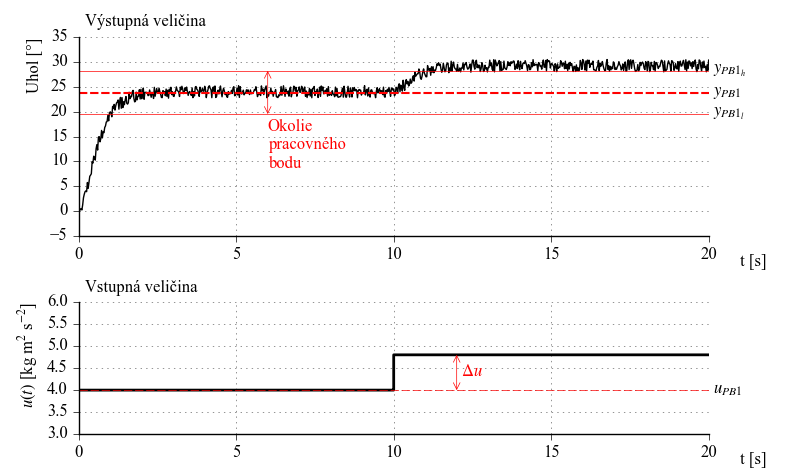

In [93]:
fig = plt.figure(5, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

xlims = [0, 20]

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)
    ax.set_xlim(xlims)
#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(t_log, vystVelicina,
         '-k', lw=1.0,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.set_ylim([3,6])

ax1.plot(t_log, u,
         '-k', lw=2.0, drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)

#-------------
#Doplnujuce info v obr:

#--------
ax0.plot(xlims, [y_PB1, y_PB1],
         '--r', dashes=[6,2], lw=1.5,
         )
ax0.text(xlims[1], y_PB1,
         u' $y_{PB1}$',
         ha='left', va='center',
        )
ax0.plot(xlims, [y_PB1_h, y_PB1_h],
         '-r', lw=0.5,
         )
ax0.text(xlims[1], y_PB1_h,
         u' $y_{PB1_h}$',
         ha='left', va='center',
        )
ax0.plot(xlims, [y_PB1_l, y_PB1_l],
         '-r', lw=0.5,
         )
ax0.text(xlims[1], y_PB1_l,
         u' $y_{PB1_l}$',
         ha='left', va='center',
        )
ax0.annotate(s='', xy=(6,y_PB1_h), xytext=(6,y_PB1_l), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5,),
            )
ax0.text(6, y_PB1_l*0.95,
         u'Okolie\npracovného\nbodu',
         ha='left', va='top', color='red',
        )

#--------
ax1.plot(xlims, [u_PB1, u_PB1],
         '--r', dashes=[6,2], lw=0.5,
         )
ax1.text(xlims[1], u_PB1,
         u' $u_{PB1}$',
         ha='left', va='center',
        )

ax1.annotate(s='', xy=(12,u_PB1), xytext=(12,u_PB1 + u_PB1_okol), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=0.5,),
            )
ax1.text(12, u_PB1+0.4,
         u' $\Delta u$',
         ha='left', va='center', color='red',
        )
#---------------------------------------------- 

Veľkosť skokovej zmeny vstupného signálu je na obrázku označená ako $\Delta u$. V tomto prípade, vzhľadom na zvolené okolie pracovného bodu je $\Delta u = 0,8$.

Jednotkový skok nastal v čase $t=10$ [s]. Pred týmto časom sa systém dostával do pracovného bodu. Od času $t=10$ [s] až pokým sa výstupná veličina systému opäť neustálila prebieha prechodový dej, to je prechodová charakteristika (keďže na vstupe bol jednotkový skok).

### Spracovanie nameraného

Pred jednotkovým skokom sme očakávali, že výstupná veličina sa ustáli na hodnote $y_{PB}$. Podľa modelu prevodovej charakteristiky to pre tento pracovný bod je hodnota:

In [94]:
print u'y_PB1 = {:6.2f} [°]'.format(y_PB1)

y_PB1 =  23.76 [°]


Priemerná hodnota výstupnej veličiny počas doby 5 sekúnd pred jednotkovým skokom je:

In [95]:
temp_Mask = np.logical_and((t_log < 10), (t_log>5))
y_PB1_data = np.mean(vystVelicina[temp_Mask])

print u'y_PB1_data     = {:6.2f} [°]'.format(y_PB1_data) 
print u'y_PB1_odchylka = {:6.2f} [°]'.format(y_PB1_data - y_PB1) + u',   to je {:5.2f} [%]'.format(((y_PB1_data - y_PB1)/y_PB1)*100)

y_PB1_data     =  23.99 [°]
y_PB1_odchylka =   0.23 [°],   to je  0.96 [%]


Odchýlka priemernej hodnoty okolo ktorej sa systém ustálil v pracovnom bode od očakávanej hodnoty podľa modelu prevodovej charakteristiky je približne 1 %. To je samozrejme prijateľná odchýlka. Ďalej teda môžme považovať hodnotu `y_PB1` podľa prevodovej charakteristiky za hodnotu, na ktorej bola ustálená výstupná veličina pred skokovou zmenou vstupného signálu.

Po ukončení prechodového deja sa podľa modelu prevodovej charakteristiky očakáva, že výstupná veličina sa ustáli na hodnote

In [96]:
print u'y_PB1_h     = {:6.2f} [°]'.format(y_PB1_h)

y_PB1_h     =  28.24 [°]


(to je hodnota $y_{PB1_h}$) Už z obr. 5 je zrejmé, že v skutočnosti sa výstupná veličina ustáli na o niečo vyššej hodnote.

Presnejšie, ak uvažujeme časový úsek po jednotkovom skoku, na ktorom je už výstupná veličina ustálená, nech je to úsek 2,5 až 5 sekúnd po jednotkovom skoku, tak na tomto úseku je priemerná hodnota výstupnej veličiny:

In [97]:
temp_Mask = np.logical_and((t_log <= 15), (t_log>12.5))
y_PB1_h_data = np.mean(vystVelicina[temp_Mask])

print u'y_PB1_h_data     = {:6.2f} [°]'.format(y_PB1_h_data) 

y_PB1_h_data     =  29.36 [°]


Ak pri hodnote $y_{PB1}$ bol rozdiel medzi očakávaným (podľa prevodovej charakteristiky) a nameraným priam zanedbateľný, pri hodnote $y_{PB1_h}$ to už nie je také jednoznačné. Nie je jednoznačné, že rozdiel je zanedbateľný. Tento problém však súvisí s meraním prevodovej charakteristiky a následnou voľbou modelu prevodovej charakteristiky, ktorý sme sa tu rozhodli používať pri odhadovaní očakávaných hodnôt $y_{PB1}$ a $y_{PB1_h}$. Ak sme sa raz rozhodli používať daný model prevodovej charakteristiky, potom s prípadnými odchýlkami, ktoré zjavne nie sú omyly, je potrebné počítať.

Týmto sme chceli povedať, že napriek tomu, že čo sa očakávaných hodnôt týka, po jednotkovom skoku výstupná veličina opustila očakávané okolie pracovného bodu. Avšak je to len očakávané, odhadované okolie (na základe prevodovej charakteristiky). Odchýlky od „reálnych“ hodnôt sú prijateľné a teda môžeme pokračovať bez nutnosti prehodnotiť voľbu okolia pracovného bodu.

#### „Vystrihnutie“ prechodovej charakteristiky

Vyberme z dát na obr. 5 len tú časť, ktorá zodpovedá prechodovej charakteristike, teda dáta od času 10 až po ustálenie (nech je to čas 15). 

In [98]:
temp_Mask = np.logical_and((t_log >= 10), (t_log <= 15))

surovaPCH_t = t_log[temp_Mask]
surovaPCH_y = vystVelicina[temp_Mask]
surovaPCH_u = u[temp_Mask]

<IPython.core.display.Javascript object>


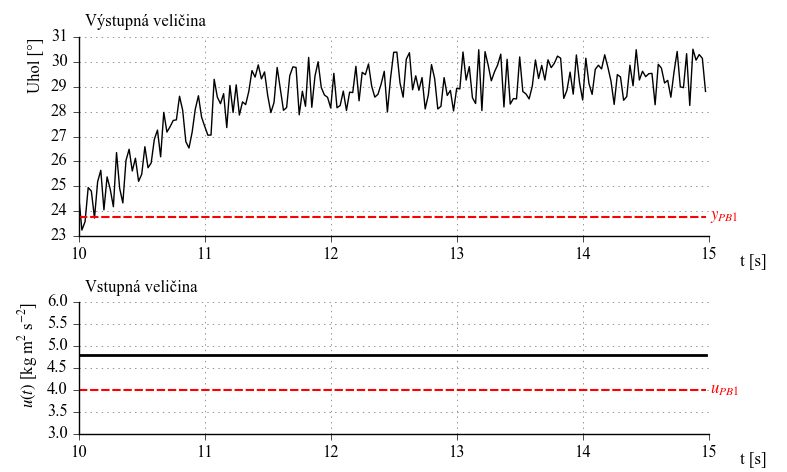

In [99]:
fig = plt.figure(6, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(surovaPCH_t, surovaPCH_y,
         '-k', lw=1.0,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.set_ylim([3,6])

ax1.plot(surovaPCH_t, surovaPCH_u,
         '-k', lw=2.0, drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')
   
#-------------
#Doplnujuce info v obr:

ax0.plot([surovaPCH_t[0],surovaPCH_t[-1]], [y_PB1, y_PB1],
         '--r', dashes=[6,2], lw=1.5,
         )
ax0.text(surovaPCH_t[-1], y_PB1,
         u' $y_{PB1}$',
         ha='left', va='center',
         color='red',
        )
ax1.plot([surovaPCH_t[0],surovaPCH_t[-1]], [u_PB1, u_PB1],
         '--r', dashes=[6,2], lw=1.5,
         )
ax1.text(surovaPCH_t[-1], u_PB1,
         u' $u_{PB1}$',
         ha='left', va='center',
         color='red',
        )
#------------- 
fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)
#---------------------------------------------- 

#### „Posunutie“ prechodovej charakteritiky

Pre potreby ďalšej práce s prechodovou charaketristikou je zvyčajne výhodné posunúť namerané dáta tak aby začiatok prechodovej charakteristiky bol v bode (0,0), to znameá, že PCH začína v  čase 0 a hodnota výstupnej veličiny v začiatku je tiež nula (aspoň filozoficky).

Konkrétne: od získaného priebehu výstupnej veličiny je potrebné odčítať hodnotu $y_{PB}$, pretože tak sa začiatok posunie v smere osi y do nuly (filozoficky... teraz nám to asi bude kaziť šum). Rovnako priebeh vstupnej veličiny je potrebné posunúť v smere osi o hodnotu $u_{PB}$. Samozrejme, od časového vektora je potrebné odčítať čas, v ktorom nastal jednotkový skok.

In [100]:
posunutaPCH_t = surovaPCH_t - 10.0
posunutaPCH_y = surovaPCH_y - y_PB1 
posunutaPCH_u = surovaPCH_u - u_PB1 

<IPython.core.display.Javascript object>


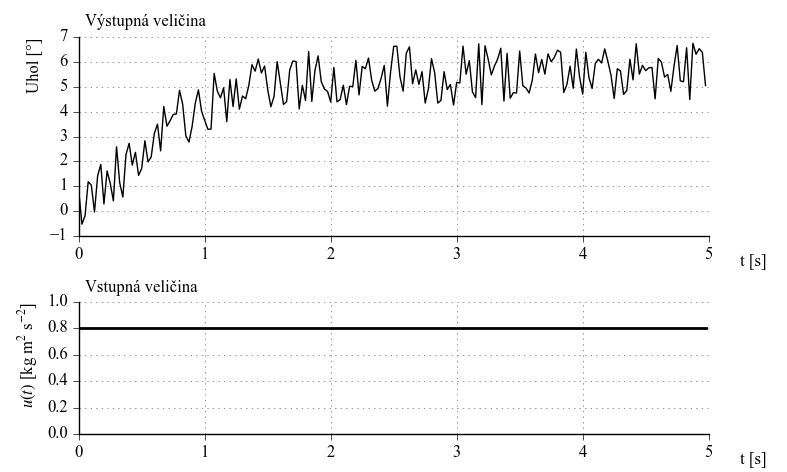

In [101]:
fig = plt.figure(7, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(posunutaPCH_t, posunutaPCH_y,
         '-k', lw=1.0,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.set_ylim([0,1])

ax1.plot(posunutaPCH_t, posunutaPCH_u,
         '-k', lw=2.0, drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')


fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)
#---------------------------------------------- 

#### Odčítavanie hodnôt z grafu PCH

Teraz je možné odčítať hodnoty z grafu PCH podľa potreby.

##### Statické zosilnenie $K$

Zistime statické zosilnenie systému v okolí tohto pracovného bodu. Potrebujeme hodnotu, na ktorej sa ustálila výstupná veličina po prechodovom deji. Z grafu PCH uvažujme, že výstupná veličina je už ustálená po čase $t=3$ [s] (dajme tomu teraz takto). Priemerná hodnota výstupnej veličiny po tomto čase je $\Delta y$

In [102]:
temp_Mask = posunutaPCH_t >= 3.0
Delta_y = np.mean(posunutaPCH_y[temp_Mask])

print u'Delta_y = {:6.2f} [°]'.format(Delta_y) 

Delta_y =   5.65 [°]


Teda, po uskutočnení jednotkového skoku v okolí pracovného bodu sa výstupná veličina zmenila o $\Delta y$ [°]. Zmena na vstupe $\Delta u$ bola, samozrejme, práve jednotková (pretože jednotkový skok). V tomto prípade má jednotkový skok veľkosť okolia pracovného bodu

In [103]:
print u_PB1_okol

0.8


Statické zosilnenie systému, na základe prechodovej charakteristiky, označme $K$, je $K = \frac{\Delta y}{\Delta u}$, číselne:

In [104]:
K = Delta_y/u_PB1_okol

print u'K = {:6.2f} [°/(kg m^2 s^-2)]'.format(K)

K =   7.06 [°/(kg m^2 s^-2)]


Uvedené možno znázorniť aj do grafu:

<IPython.core.display.Javascript object>


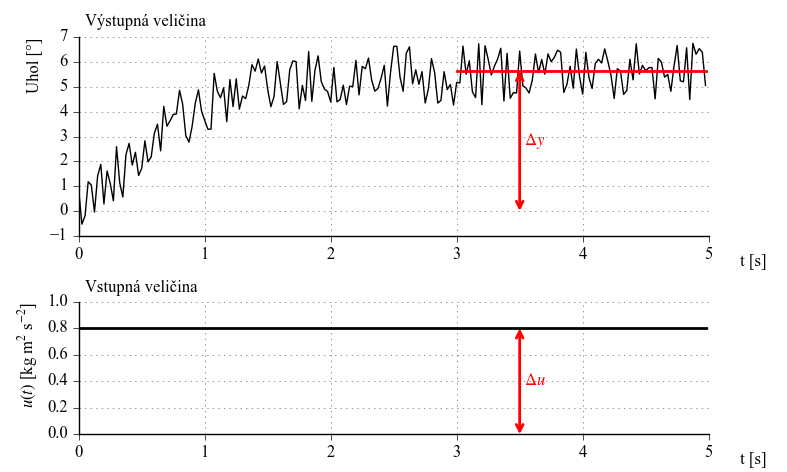

In [105]:
fig = plt.figure(8, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(posunutaPCH_t, posunutaPCH_y,
         '-k', lw=1.0,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.set_ylim([0,1])

ax1.plot(posunutaPCH_t, posunutaPCH_u,
         '-k', lw=2.0, drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')


fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)
#----------------------------------------------
ax0.plot([3, posunutaPCH_t[-1]], [Delta_y, Delta_y],
         '-r', lw=2,
         )
ax0.annotate(s='', xy=(3.5,0), xytext=(3.5,Delta_y), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=2,),
            )
ax0.text(3.5, Delta_y*0.5,
         u' $\Delta y$',
         ha='left', va='center', color='red',
        )

ax1.annotate(s='', xy=(3.5,0), xytext=(3.5,u_PB1_okol), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=2,),
            )
ax1.text(3.5, u_PB1_okol*0.5,
         u' $\Delta u$',
         ha='left', va='center', color='red',
        )

Statické zosilnenie systému je, samozrejme, možné zistiť aj pomocou prevodovej charakteristiky. V skutočnosti, všetko potrebné už máme k dispozícii.

Mimochodom, ak by sme neboli leniví, tak nájdeme dotyčnicu v pracovnom bode, a jej smernica (sklon) by mala byť statické zosilnenie. To by bol formálne korektný postup.

Hľadáme sklon prevodovej charakteristiky v okolí pracovného bodu. Z praktického hľadiska, nech je sklon daný pracovným bodom a bodom ohraničujúcim okolie pracovného bodu zhora. Formálne $\text{sklon} = \frac{\Delta y}{\Delta u}$ kde $\Delta y = y_{PBh} - y_{PB}$ a $\Delta u = u_{PBh} - u_{PB}$. To je, samozrejme, to isté ako vyplynulo z využitia prechodovej charakteristiky vyššie. Tu však číselné hodnoty nie sú odčítané z prechodovej charakteristiky ale z modelu prevodovej charakteristiky. Konkrétne čísla sú:

In [106]:
PB1_sklon = (y_PB1_h - y_PB1) / ( u_PB1_okol )
print u'PB1_sklon = {:6.2f}'.format(PB1_sklon) + u'  [°/(kg m^2 s^-2)]'

PB1_sklon =   5.60  [°/(kg m^2 s^-2)]


Odchýlka od statického zosilnenia určeného z prechodovej charakteristiky je: (tá je samozrejme daná aj tým, že používame model prevodovej charakteristiky, keďže konkrétne potrebné hodnoty v rámci nameranej prevodovej charakteristiky nie sú dostupné)

In [107]:
PB1_sklon_odchylka = PB1_sklon - K
print u'PB1_sklon_odchylka = {:6.2f}'.format(PB1_sklon_odchylka) + u'  [°/(kg m^2 s^-2)]'
print u'PB1_sklon_odchylka = {:6.2f}'.format((np.abs(PB1_sklon_odchylka)/K)*100.0) + u'  [%]'

PB1_sklon_odchylka =  -1.46  [°/(kg m^2 s^-2)]
PB1_sklon_odchylka =  20.63  [%]


##### Časová konštanta $T$ pre lineárny dynamický systém 1. rádu

V rámci vedľajšej úlohy je potrebné identifikovať model, ktorý má vystihovať dynamiku (dynamické vlastnosti) reálneho systému. Modelom má byť lineárny dynamický systém.

Kvalifikovaný odhad založený na grafickom znázornení predmetnej prechodovej charakteristiky vedie k možnosti, že modelom systému môže byť dynamický systém 1. rádu. Tento je možné zapísať v tvare prenosovej funkcie

$$
G(s) = \frac{y(s)}{u(s)} = \frac{K}{Ts+1}
$$

kde $K$ je možné interpretovať ako statické zosilnenie systému a $T$ je časová konštanta.

Časovú konštatnu je možné identifikovať na základe prechodovej charakteristiky. Je to čas od začiatku prechodovej charakteristiky (od času jednotkového skoku), v ktorom výstupná veličina dosiahla približne 63% zo svojej ustálenej hodnoty.

Prečo práve 63%? Odpoveď sa ponecháva na čitateľa.

100% z ustálenej hodnoty na obrázku 8 je samozrejme hodnota $\Delta y$. Potom 63% je hodnota

In [108]:
Delta_y63 = Delta_y * 0.63
print u'Delta_y63 = {:6.2f}'.format(Delta_y63) + u'  [°]'

Delta_y63 =   3.56  [°]


<IPython.core.display.Javascript object>


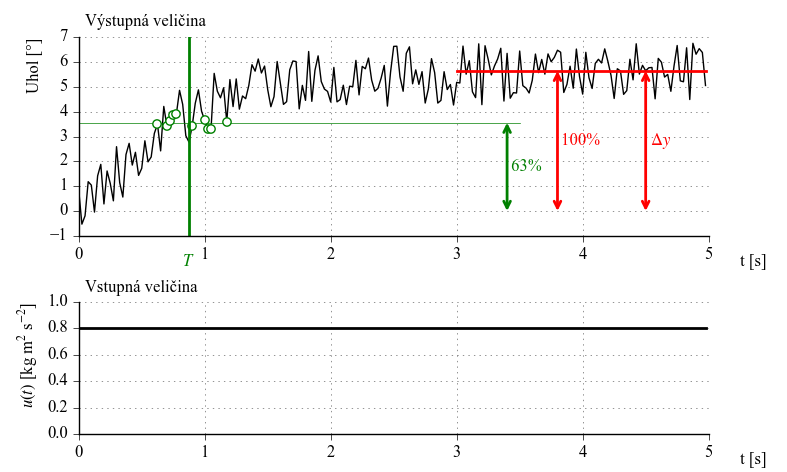

In [109]:
fig = plt.figure(9, figsize=(20/2.54, 12/2.54))

subPlots = gridspec.GridSpec(2, 1, height_ratios=[60, 40])

ax0 = plt.subplot(subPlots[0])
ax1 = plt.subplot(subPlots[1])

for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(posunutaPCH_t, posunutaPCH_y,
         '-k', lw=1.0,
         )
#------------------
ax1.set_title(u'Vstupná veličina', x=0.01, y=1.02, ha='left')
ax1.set_ylabel(u'$u(t)$ [kg m$^2$ s$^{-2}$]', y=1, ha='right', rotation='vertical')

ax1.set_ylim([0,1])

ax1.plot(posunutaPCH_t, posunutaPCH_u,
         '-k', lw=2.0, drawstyle='steps-post',
         )
#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')


fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.92, 0.08)
#----------------------------------------------
ax0.plot([3, posunutaPCH_t[-1]], [Delta_y, Delta_y],
         '-r', lw=2,
         )
ax0.annotate(s='', xy=(4.5,0), xytext=(4.5,Delta_y), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=2,),
            )
ax0.text(4.5, Delta_y*0.5,
         u' $\Delta y$',
         ha='left', va='center', color='red',
        )

ax0.annotate(s='', xy=(3.8,0), xytext=(3.8,Delta_y), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='r', lw=2,),
            )
ax0.text(3.8, Delta_y*0.5,
         u' 100%',
         ha='left', va='center', color='red',
        )



ax0.plot([0, 3.5], [Delta_y63, Delta_y63],
         '-g', lw=0.5,
         )

ax0.annotate(s='', xy=(3.4,0), xytext=(3.4,Delta_y63), 
             arrowprops=dict(arrowstyle='<->', shrinkA = 0, shrinkB = 0, ec='g', lw=2,),
            )
ax0.text(3.4, Delta_y63*0.5,
         u' 63%',
         ha='left', va='center', color='g',
        )



Hodnotu $T$ teraz možno hľadať „od oka“, doslova pomocou grafu PCH na obr. 6, prípadne „od oka“ ale trošku inak - napr: Nájdime hodnoty výstupnej veličiny, ktoré sú v pásme (volajme ho „od oka“) $\pm ? \%$ v okolí hodnoty `Delta_y63`. Presnejšie, nádime časy tých vzoriek, ktoré sú v tom pásme:

In [110]:
temp_pct = 0.1
temp_Mask = np.logical_and( (posunutaPCH_y >= (Delta_y63-(Delta_y63*temp_pct))), (posunutaPCH_y <= (Delta_y63+(Delta_y63*temp_pct))))
print posunutaPCH_t[temp_Mask]

[ 0.625  0.7    0.725  0.75   0.775  0.9    1.     1.025  1.05   1.175]


Vyznačme do grafu vyššie:

In [111]:
ax0.plot(posunutaPCH_t[temp_Mask], posunutaPCH_y[temp_Mask],
         'og', ms=6, mec='g', mew=1.0, mfc='w',
         )

Priemer z nájdených časov je

In [112]:
T = np.mean(posunutaPCH_t[temp_Mask])
print u'T = {:6.2f}'.format(T) + u'  [s]'

T =   0.87  [s]


...a táto hodnota môže byť celkom dobre „od oka“ odčítaná časová konštanta. Dokreslime ju do grafu vyššie:

In [113]:
ax0.plot([T, T], ax0.get_ylim(),
         '-g', lw=2,
         )

ax0.text(T, ax0.get_ylim()[0],
         u'\n$T$',
         ha='center', va='top', color='g',
        )

#### Verifikácia identifikovaného dynamického modelu

V predchádzajúcom boli na základe prechodovej charakteristiky určené parametre lineárneho dynamického systému, ktorý má byť modelom skutočného systému. Tento model je možné vyjadriť v tvare prenosovej funkcie

$$
\frac{y(s)}{u(s)} = \frac{K}{Ts+1}
$$

Pre verifikáciu modelu je možné využiť grafické porovnanie prechodovej charakteristiky modelu a skuročnej prechodovej charakteristiky.

Pre získanie PCH modelu využime numerickú simuláciu. Daná prenosová funkcia zodpovedá diferenciálnej rovnici v tvare

$$
\begin{align}
    T \dot y(t) + y(t) &= K u(t) \\
    T \dot y(t) &= - y(t) + K u(t) \\
    \dot y(t) &= - \frac{1}{T} y(t) + \frac{K}{T} u(t)
\end{align}
$$

Rovnicu je možné zapísať v tvare funkcie použiteľnej pre ODE solver:

In [114]:
def fcn_ss1r(x, t, u):
    y = x
    doty = -(1.0/T) * y + (K/T) * u
    return doty

Vstupný signál zvoľme rovnaký ako je veľkosť $\Delta u$ (je to premenná `u_PB1_okol`). Tak zabezpečíme zodpovedajúcu veľkosť jednotkového skoku, ktorý je použitý v numerickej simulácii pre získanie PCH.

Časový vektor, pre ktorý hľadáme numerické riešenie:

In [115]:
timeVect = np.arange(0, 5.0, 0.1)

Zavolajme ODE solver:

In [116]:
x = odeint(fcn_ss1r,
           [0],   # začiatočné podmienky
           timeVect,
           args=(u_PB1_okol,),
           )

Do spoločného obrázku nakreslime nameranú PCH a PCH modelu systému.

<IPython.core.display.Javascript object>


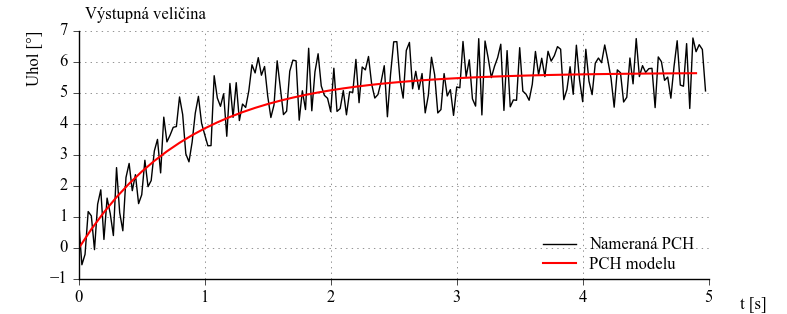

In [117]:
fig = plt.figure(10, figsize=(20/2.54, 8/2.54))
subPlots = gridspec.GridSpec(1, 1,)
ax0 = plt.subplot(subPlots[0])
for ax in fig.get_axes():
    fcnDefaultAxisStyle(ax)

#------------------
ax0.set_title(u'Výstupná veličina', x=0.01, y=1.02, ha='left')
ax0.set_ylabel(u'Uhol [°]', y=1, ha='right', rotation='vertical')

ax0.plot(posunutaPCH_t, posunutaPCH_y,
         '-k', lw=1.0,
         label=u'Nameraná PCH',
         )

ax0.plot(timeVect, x,
         '-r', lw=1.5,
         label=u'PCH modelu'
         )

#------------------
for ax in fig.get_axes():
    ax.set_xlabel(u't [s]', x=1.05, ha='left', va='bottom')

fcnDefaultLayoutAdj(fig, 0.1, 0.4, 0.90, 0.11)

#--------
handles_ax0, labels_ax0 = ax0.get_legend_handles_labels()
ax0.legend(handles_ax0, labels_ax0,
           loc=4, bbox_to_anchor=(0.98, 0.02), ncol=1,
           )
#----------------------------------------------

Týmto (aspoň pre naše potreby) možno model považovať za verifikovaný - znamená to, že daný model je schopný vystihnúť vlastnosti skutočného systému a že je možné na základe dostupných informácii (prechodová charakteristika) identifikovať parametre modelu.